##Jorge Gerardo Iglesias Ortiz$\;\;\;\;\;\;\;\;\;\;$A01653261
##Francisco Emiliano Rocha Pineda$\;\;\;$A01652082
##Jorge Antonio Hoyo García$\;\;\;\;\;\;\;\;\;\;\;$A01658142

#Análisis del modelo

Importar librerías

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

Importar datos

In [ ]:
drive.mount("/content/drive/")
ruta_al_archivo = "/content/drive/MyDrive/TC3006C/Reto/train.csv"
train = pd.read_csv(ruta_al_archivo)
train

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
ruta_al_archivo = "/content/drive/MyDrive/TC3006C/Reto/test.csv"
test = pd.read_csv(ruta_al_archivo)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#Eliminar datos no presindibles
try:
  train['Ticket']
  trainOriginal = train.copy()
except:
  train = trainOriginal.copy()
del train['Ticket']
del train['Cabin']
del train['Embarked']
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000


In [ ]:
try:
  test['Ticket']
  testOriginal = test.copy()
except:
  test = testOriginal.copy()
del test['Ticket']
del test['Cabin']
del test['Embarked']
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500


In [ ]:
#Vemos datos faltantes y de paso categorizamos a numerico el sexo siendo female: 1 y male: 0
train['PassengerId'] = train['PassengerId'].astype('category')
train['Sex'] = (train['Sex']=='female').astype(np.int0)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    category
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 96.8+ KB
None


In [ ]:
test['PassengerId'] = test['PassengerId'].astype('category')
test['Sex'] = (test['Sex']=='female').astype(np.int0)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    category
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    int64   
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Fare         417 non-null    float64 
dtypes: category(1), float64(2), int64(4), object(1)
memory usage: 43.2+ KB
None


Text(0, 0.5, 'Frecuencia Pasajeros [NU]')

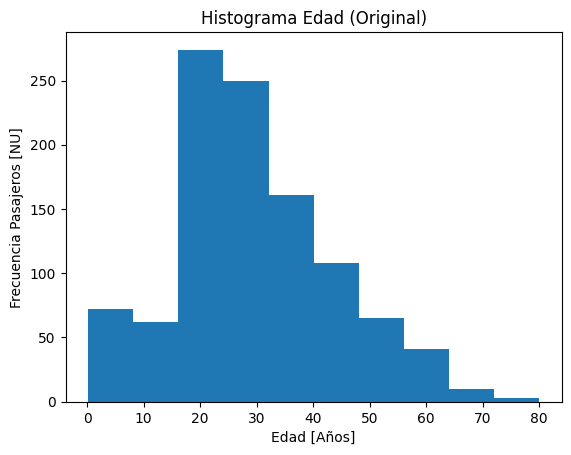

In [ ]:
#Analizamos la distribución de edad
import matplotlib as mpl
train_Age = train.loc[train['Age'].notnull(), ['Age']].to_numpy(dtype = np.float32).reshape(-1, 1)
test_Age = test.loc[test['Age'].notnull(), ['Age']].to_numpy(dtype = np.float32).reshape(-1, 1)
complete_Age = np.concatenate((train_Age, test_Age))
plt.hist(complete_Age)
plt.title("Histograma Edad (Original)")
plt.xlabel("Edad [Años]")
plt.ylabel("Frecuencia Pasajeros [NU]")

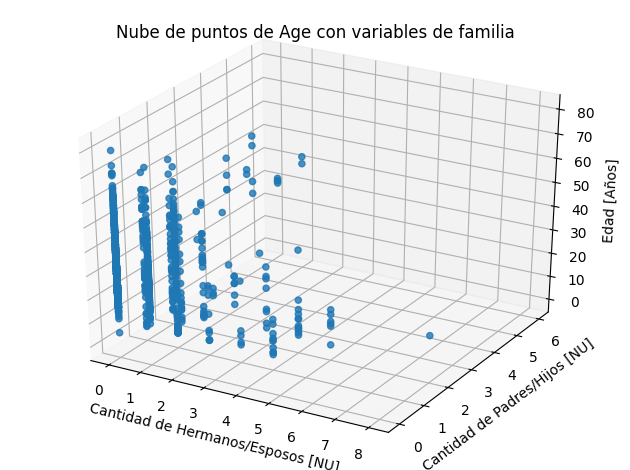

In [ ]:
#Revisamos si la edad tiene que ver con la familia
mpl.rcParams.update(mpl.rcParamsDefault)
train_Age = train.loc[train['Age'].notnull(), ['SibSp','Parch','Age']].to_numpy(dtype = np.float32).reshape(-1, 3)
test_Age = test.loc[test['Age'].notnull(), ['SibSp','Parch','Age']].to_numpy(dtype = np.float32).reshape(-1, 3)
complete_Age = np.concatenate((train_Age, test_Age))
plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter3D( complete_Age[:,0], complete_Age[:,1], complete_Age[:,2], alpha=0.8)
plt.title("Nube de puntos de Age con variables de familia")
plt.xlabel("Cantidad de Hermanos/Esposos [NU]")
plt.ylabel("Cantidad de Padres/Hijos [NU]")
ax.set_zlabel("Edad [Años]")
plt.tight_layout()

In [ ]:
#Como se encuentran distintas distribuciones de edad en distintas cantidades de familia, se calculan las medianas dependiendo de las distribuciones por cantidad de familiares
d = {}
for s, p, a in complete_Age:
  try:
    d[str(int(s))+'-'+str(int(p))] += [a]
  except:
    d[str(int(s))+'-'+str(int(p))] = [a]
for l,n in zip(d.values(), d.keys()):
  d[n] = np.median(np.array(l))
print(d)

{'1-0': 30.0, '0-0': 29.0, '3-1': 6.0, '0-2': 24.0, '1-1': 27.0, '1-5': 39.0, '4-1': 7.0, '3-2': 14.5, '2-0': 25.0, '1-2': 24.0, '0-1': 25.0, '5-2': 10.5, '4-2': 7.5, '3-0': 31.0, '1-3': 48.0, '2-2': 18.0, '1-4': 52.5, '2-1': 5.0, '2-3': 24.0, '0-4': 29.0, '0-5': 40.0, '1-6': 41.5, '0-3': 30.0, '8-2': 14.5}


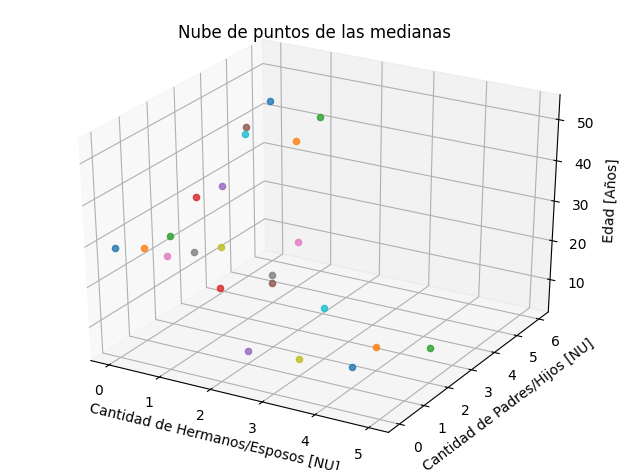

In [ ]:
#Observamos las medianas en el plano tridimensional
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure()
ax = plt.axes(projection ="3d")
for s in range(0,6):
  for p in range(0,7):
    try:
      ax.scatter3D( s, p, d[str(int(s))+'-'+str(int(p))], alpha=0.8)
    except:
      pass

plt.title("Nube de puntos de las medianas")
plt.xlabel("Cantidad de Hermanos/Esposos [NU]")
plt.ylabel("Cantidad de Padres/Hijos [NU]")
ax.set_zlabel("Edad [Años]")
plt.tight_layout()

In [ ]:
#Finalmente agregamos las edades faltantes con mediana
train_Age = train[['SibSp','Parch','Age']].to_numpy(dtype = np.float32).reshape(-1, 3)
newAge = []
for s, p, a in train_Age:
  if(np.isnan(a)):
    newAge.append(d[str(int(s))+'-'+str(int(p))])
  else:
    newAge.append(a)
print(len(newAge))
train['Age'] = newAge
train.info()

891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    category
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float32 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
dtypes: category(1), float32(1), float64(1), int64(5), object(1)
memory usage: 93.3+ KB


In [ ]:
newAge = []
test_Age = test[['SibSp','Parch','Age']].to_numpy(dtype = np.float32).reshape(-1, 3)
for s, p, a in test_Age:
  if(np.isnan(a)):
    try:
      newAge.append(d[str(int(s))+'-'+str(int(p))])
    except:
      newAge.append(np.median(complete_Age[:,2]))
  else:
    newAge.append(a)
print(len(newAge))
test['Age'] = newAge
test.info()

418
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    category
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    int64   
 4   Age          418 non-null    float32 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Fare         417 non-null    float64 
dtypes: category(1), float32(1), float64(1), int64(4), object(1)
memory usage: 41.6+ KB


Text(0, 0.5, 'Frecuencia Pasajeros [NU]')

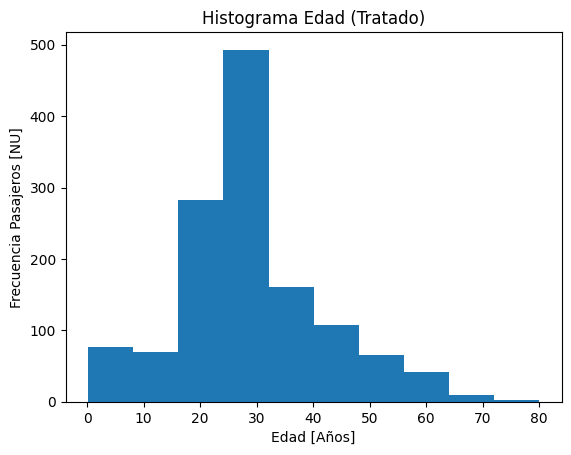

In [ ]:
#Revisamos distribución de nuevo
mpl.rcParams.update(mpl.rcParamsDefault)
train_Age = train['Age'].to_numpy(dtype = np.float32).reshape(-1, 1)
test_Age = test['Age'].to_numpy(dtype = np.float32).reshape(-1, 1)
complete_Age = np.concatenate((train_Age, test_Age))
plt.hist(complete_Age)
plt.title("Histograma Edad (Tratado)")
plt.xlabel("Edad [Años]")
plt.ylabel("Frecuencia Pasajeros [NU]")

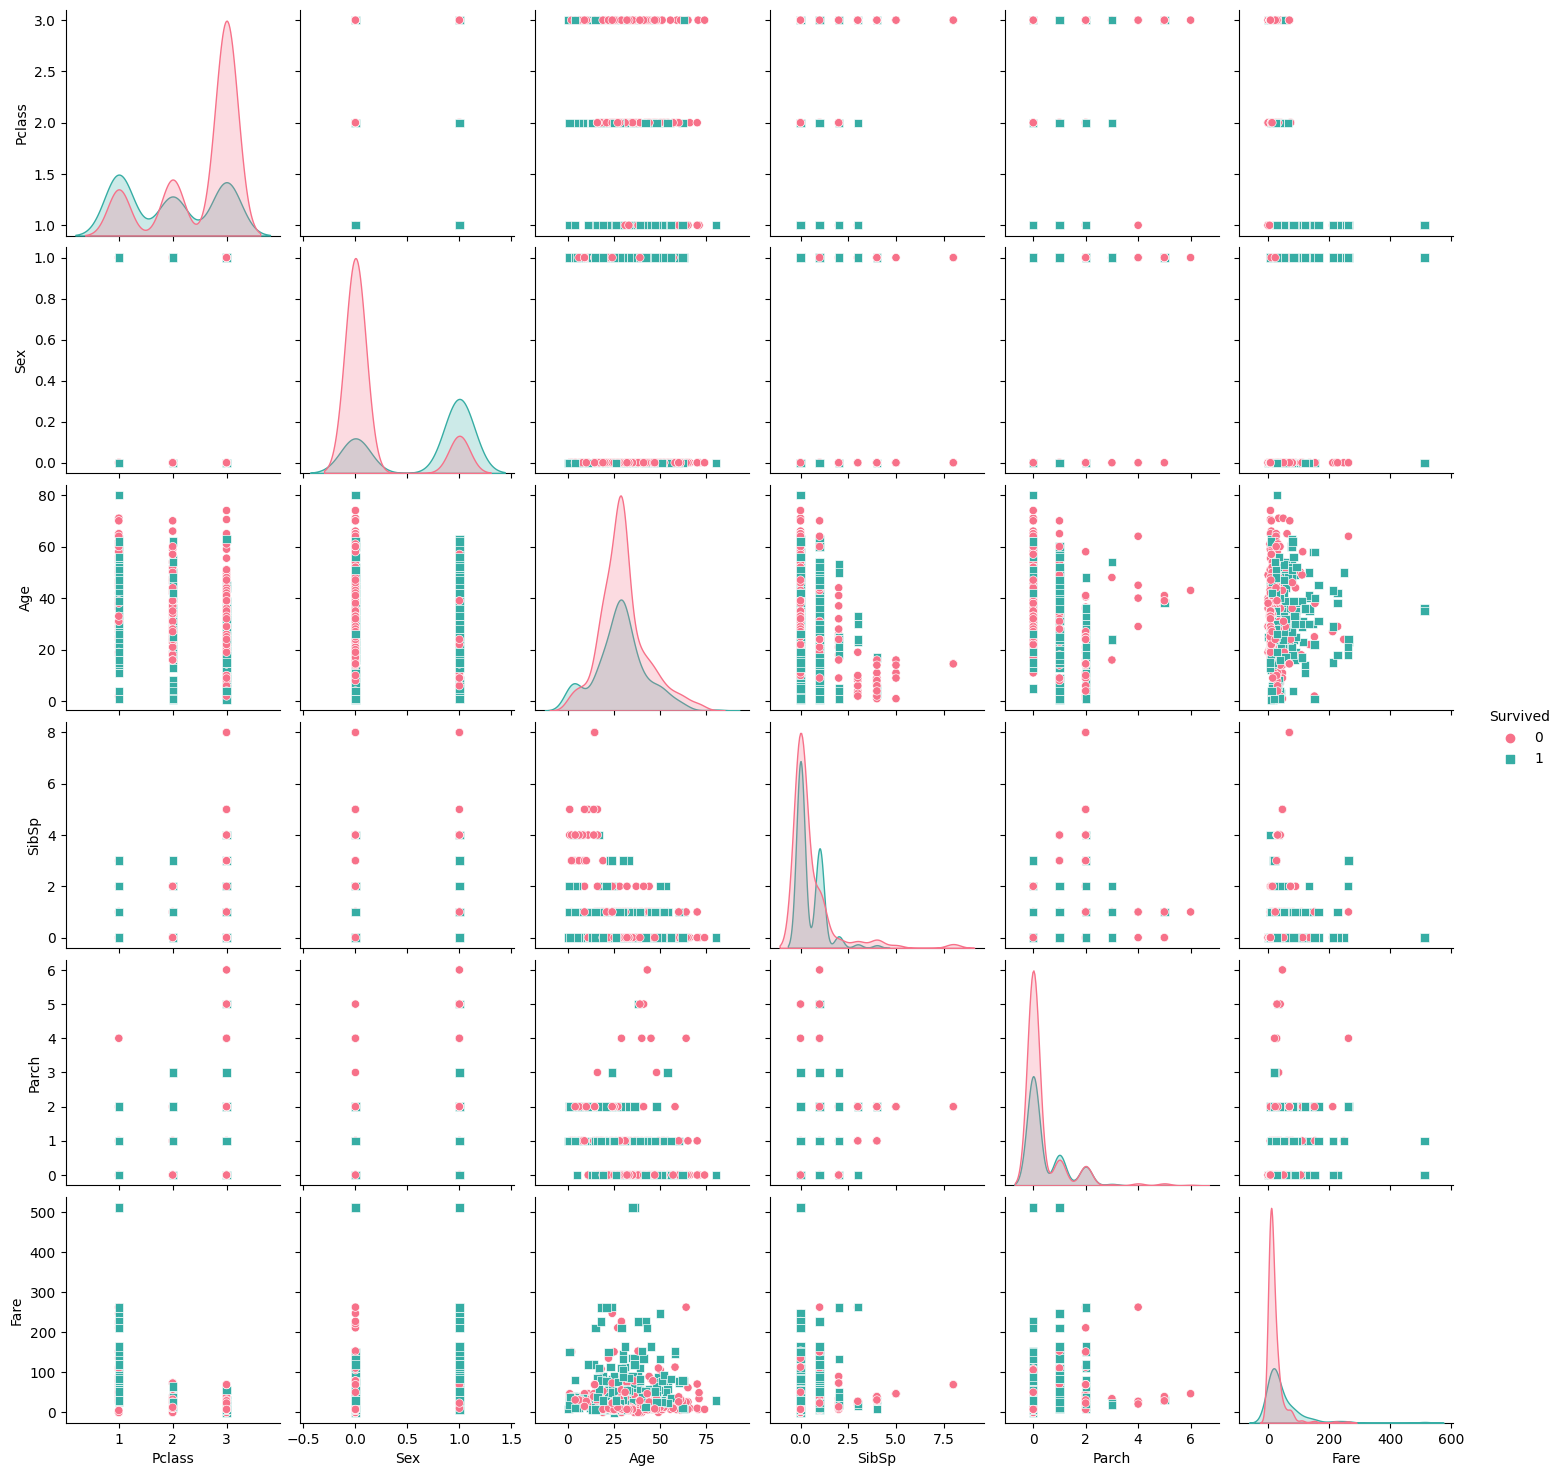

In [ ]:
# Finalmente observamos de nuevo las distribuciones de supervivencia con cada variable en train ya que están completos
p=sns.pairplot(train, hue = 'Survived', palette="husl", markers=["o", "s"])

Text(0, 0.5, 'Frecuencia Pasajeros [NU]')

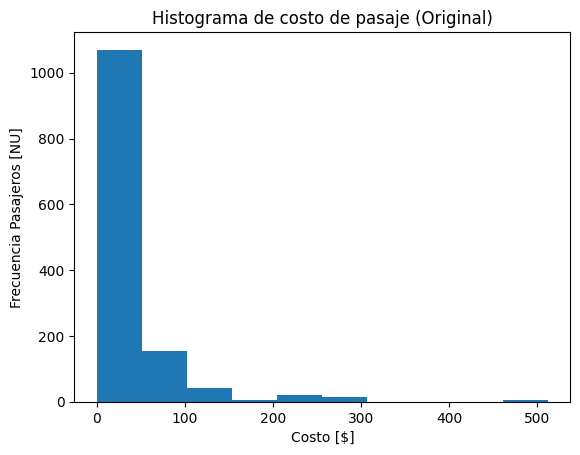

In [ ]:
#Revisamos la distribución del costo de pasaje
mpl.rcParams.update(mpl.rcParamsDefault)
train_wage = train['Fare'].to_numpy(dtype = np.float32).reshape(-1, 1)
test_wage = test.loc[test['Fare'].notnull(), ['Fare']].to_numpy(dtype = np.float32).reshape(-1, 1)
complete_wage = np.concatenate((train_wage, test_wage))
plt.hist(complete_wage)
plt.title("Histograma de costo de pasaje (Original)")
plt.xlabel("Costo [$]")
plt.ylabel("Frecuencia Pasajeros [NU]")

Text(0, 0.5, 'Clase de boleto [°]')

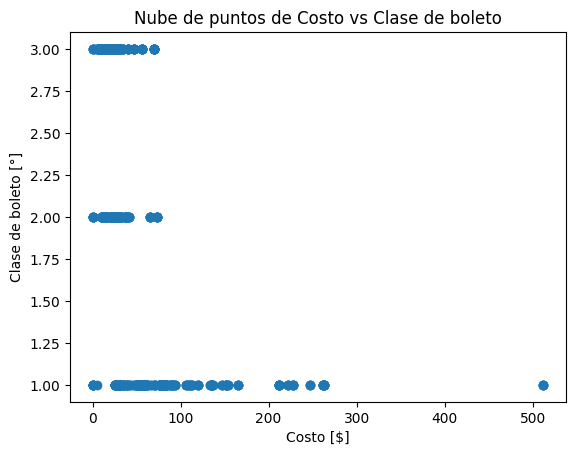

In [ ]:
# Revisamos la relación del costo del pasaje con la clase del pasajero
mpl.rcParams.update(mpl.rcParamsDefault)
train_wage = train[['Fare','Pclass']].to_numpy(dtype = np.float32).reshape(-1, 2)
test_wage = test.loc[test['Fare'].notnull(), ['Fare','Pclass']].to_numpy(dtype = np.float32).reshape(-1, 2)
complete_wage = np.concatenate((train_wage, test_wage))
plt.scatter(*complete_wage.T)
plt.title("Nube de puntos de Costo vs Clase de boleto")
plt.xlabel("Costo [$]")
plt.ylabel("Clase de boleto [°]")

In [ ]:
#Como solo se consiste de rellenar datos faltantes, calculamos mediana para rellenar el dato faltante en test
d = {}
for f, p in complete_wage:
  try:
    d[str(p)] += [f]
  except:
    d[str(p)] = [f]
for l,n in zip(d.values(), d.keys()):
  d[n] = np.median(np.array(l))
print(d)

{'3.0': 8.05, '1.0': 60.0, '2.0': 15.0458}


In [ ]:
new_fare = []
test_wage = test[['Fare','Pclass']].to_numpy(dtype = np.float32).reshape(-1, 2)
for f, p in test_wage:
  if(np.isnan(f)):
    new_fare.append(d[str(p)])
  else:
    new_fare.append(f)
print(len(new_fare))
test['Fare'] = new_fare
test.info()

418
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    category
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    int64   
 4   Age          418 non-null    float32 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Fare         418 non-null    float32 
dtypes: category(1), float32(2), int64(4), object(1)
memory usage: 40.0+ KB


Text(0, 0.5, 'Frecuencia Pasajeros [NU]')

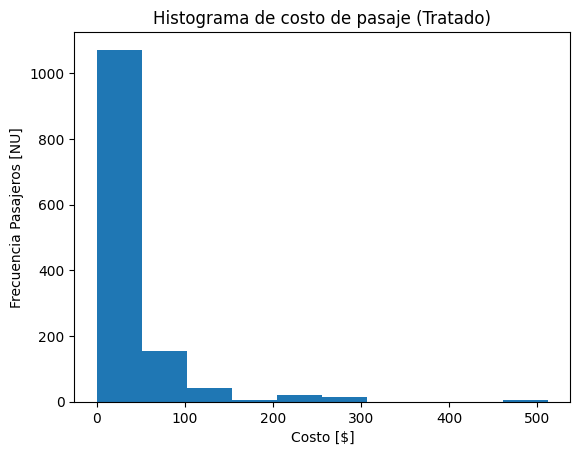

In [ ]:
#Revisamos la distribución de nuevo
mpl.rcParams.update(mpl.rcParamsDefault)
train_wage = train['Fare'].to_numpy(dtype = np.float32).reshape(-1, 1)
test_wage = test['Fare'].to_numpy(dtype = np.float32).reshape(-1, 1)
complete_wage = np.concatenate((train_wage, test_wage))
plt.hist(complete_wage)
plt.title("Histograma de costo de pasaje (Tratado)")
plt.xlabel("Costo [$]")
plt.ylabel("Frecuencia Pasajeros [NU]")

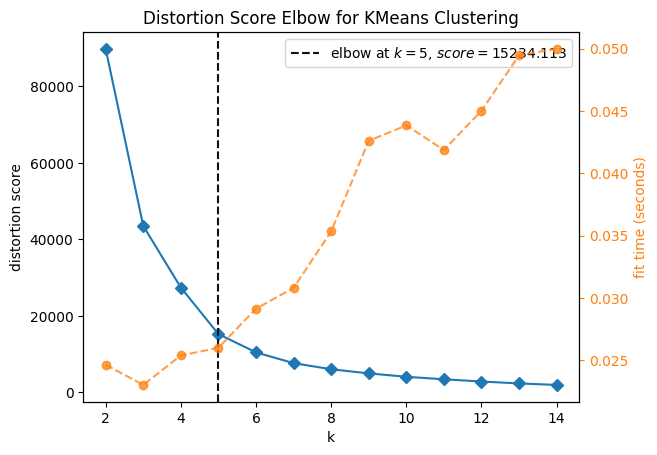

In [ ]:
#Categorizamos edad y fare para facilitar el entrenamiento
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Generate synthetic dataset with 8 random clusters

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,15)
)

visualizer.fit(complete_Age.reshape(-1, 1))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
AgeCat = KMeans(n_clusters=5,).fit(complete_Age.reshape(-1, 1))
centers = AgeCat.cluster_centers_
print(centers)
_,counts = np.unique(AgeCat.predict(complete_Age.reshape(-1, 1)), return_counts=True)
print(counts)

[[20.60617  ]
 [44.11557  ]
 [ 4.9558067]
 [30.112703 ]
 [59.993816 ]]
[372 199  98 559  81]


In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
idx = np.argsort(AgeCat.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(5)
def sortAge(X):
  tempX = X.copy()
  for r, i in zip(lut,range(5)):
    tempX[X == i] = r
  return tempX

In [ ]:
import pickle
pickle.dump(AgeCat, open('ageCat.pkl','wb'))

In [ ]:
print(AgeCat.predict(complete_Age[0].reshape(-1,1)))
print(complete_Age.dtype)
print(type(complete_Age) == type(np.array([[1]])))

[0]
float32
True


In [ ]:
train['Age'] = sortAge(AgeCat.predict(train['Age'].to_numpy(dtype = np.float32).reshape(-1, 1)))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2,0,0,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",1,1,0,0,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,1,2,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",0,2,0,0,30.0000


In [ ]:
test['Age'] = sortAge(AgeCat.predict(test['Age'].to_numpy(dtype = np.float32).reshape(-1, 1)))
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,"Kelly, Mr. James",0,2,0,0,7.829200
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,7.000000
2,894,2,"Myles, Mr. Thomas Francis",0,4,0,0,9.687500
3,895,3,"Wirz, Mr. Albert",0,2,0,0,8.662500
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,12.287500
...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,2,0,0,8.050000
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,3,0,0,108.900002
415,1307,3,"Saether, Mr. Simon Sivertsen",0,3,0,0,7.250000
416,1308,3,"Ware, Mr. Frederick",0,2,0,0,8.050000


Text(0, 0.5, 'Costo [$]')

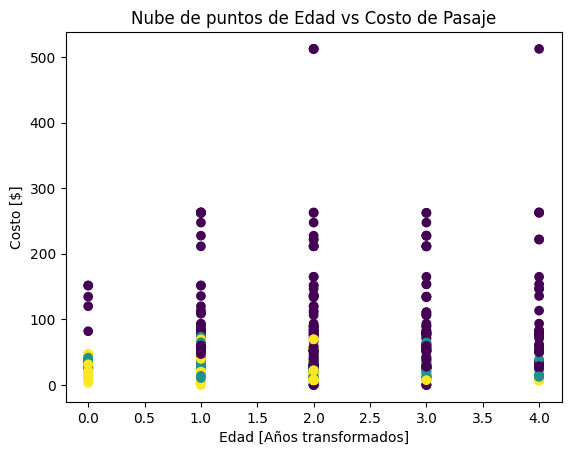

In [ ]:
#Antes de continuar haremos un clasificador de clase para facilitar al usuario escoger la clase a partir de gasto y edad
#Se revisa relación de la edad y costo del boleto con Pclass
train_wage = train[['Age','Fare','Pclass']].to_numpy(dtype = np.float32).reshape(-1, 3)
test_wage = test[['Age','Fare','Pclass']].to_numpy(dtype = np.float32).reshape(-1, 3)
complete_wage = np.concatenate((train_wage, test_wage))
plt.scatter(*complete_wage.T[0:2,:],c=complete_wage[:,2])
plt.title("Nube de puntos de Edad vs Costo de Pasaje")
plt.xlabel("Edad [Años transformados]")
plt.ylabel("Costo [$]")

In [ ]:
#Agregamos una funcionalidad a la app donde prediga a partir del costo y la edad la clase
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracyGraph = []
for i in range(1,24):
  knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
  knn.fit(train_wage[:,0:2],train_wage[:,2])
  pred_y = knn.predict(test_wage[:,0:2])
  accuracyGraph.append(accuracy_score(test_wage[:,2], pred_y))
print('highest accuracy at:',round(max(accuracyGraph)*100),'% in k:',accuracyGraph.index(max(accuracyGraph))+1)

highest accuracy at: 92 % in k: 8


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8, weights = 'distance')
knn.fit(train_wage[:,0:2],train_wage[:,2])

KNeighborsClassifier(n_neighbors=8, weights='distance')

91.86602870813397
              precision    recall  f1-score   support

         1.0       0.96      0.90      0.93       107
         2.0       0.81      0.86      0.83        93
         3.0       0.95      0.95      0.95       218

    accuracy                           0.92       418
   macro avg       0.91      0.90      0.90       418
weighted avg       0.92      0.92      0.92       418



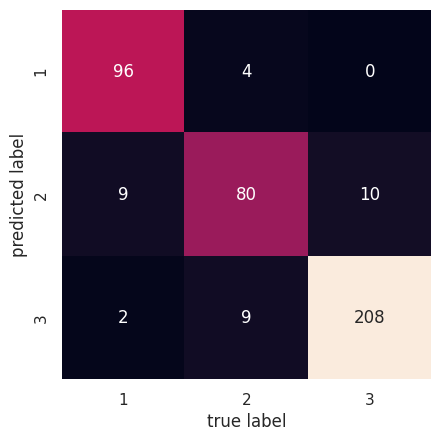

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred_y = knn.predict(test_wage[:,0:2])
cm = confusion_matrix(test_wage[:,2], pred_y)
print(accuracy_score(test_wage[:,2], pred_y)*100)
print(classification_report(test_wage[:,2], pred_y))
import seaborn as sns; sns.set()
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,xticklabels = range(1,4), yticklabels = range(1,4))
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
pickle.dump(knn, open('knn.pkl','wb'))

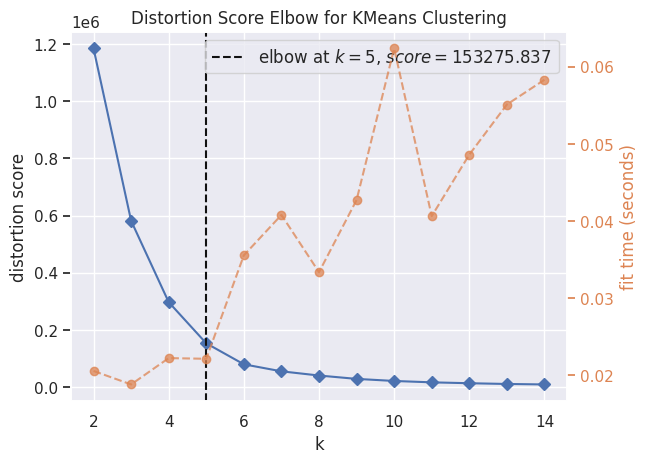

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

train_wage = train['Fare'].to_numpy(dtype = np.float32).reshape(-1, 1)
test_wage = test['Fare'].to_numpy(dtype = np.float32).reshape(-1, 1)
complete_wage = np.concatenate((train_wage, test_wage))

# Generate synthetic dataset with 8 random clusters

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,15)
)

visualizer.fit(complete_wage.reshape(-1, 1))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
FareCat = KMeans(n_clusters=5,).fit(complete_wage.reshape(-1, 1))
centers = FareCat.cluster_centers_
print(centers)
_,counts = np.unique(FareCat.predict(complete_wage.reshape(-1, 1)), return_counts=True)
print(counts)

[[ 14.803469]
 [237.78761 ]
 [ 65.95557 ]
 [133.34656 ]
 [512.3292  ]]
[1046   34  179   46    4]


In [ ]:
import matplotlib as mpl
idx = np.argsort(FareCat.cluster_centers_.sum(axis=1))
lut2 = np.zeros_like(idx)
lut2[idx] = np.arange(5)
def sortFare(X):
  tempX = X.copy()
  for r, i in zip(lut2,range(5)):
    tempX[X == i] = r
  return tempX

In [ ]:
pickle.dump(FareCat, open('fareCat.pkl','wb'))

In [ ]:
train['Fare'] = sortFare(FareCat.predict(train['Fare'].to_numpy(dtype = np.float32).reshape(-1, 1)))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,1
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,1,2,0
889,890,1,1,"Behr, Mr. Karl Howell",0,2,0,0,0


In [ ]:
test['Fare'] = sortFare(FareCat.predict(test['Fare'].to_numpy(dtype = np.float32).reshape(-1, 1)))
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,"Kelly, Mr. James",0,2,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,4,0,0,0
3,895,3,"Wirz, Mr. Albert",0,2,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,0
...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,2,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,3,0,0,2
415,1307,3,"Saether, Mr. Simon Sivertsen",0,3,0,0,0
416,1308,3,"Ware, Mr. Frederick",0,2,0,0,0


In [ ]:
# Sacamos los títulos que describen género y status en train y test
try:
  train['Name']
  trainOriginal = train.copy()
except:
  train = trainOriginal.copy()
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
del train['Name']
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,1,0,3,0,1,1,0,0,Mr
1,2,1,1,1,3,1,0,1,Mrs
2,3,1,3,1,2,0,0,0,Miss
3,4,1,1,1,2,1,0,1,Mrs
4,5,0,3,0,2,0,0,0,Mr
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2,0,0,0,Rev
887,888,1,1,1,1,0,0,0,Miss
888,889,0,3,1,1,1,2,0,Miss
889,890,1,1,0,2,0,0,0,Mr


In [ ]:
train['Title'] = train['Title'].replace(['Mlle','Ms'],'Miss')
train['Title'] = train['Title'].replace(['Mme'],'Mrs')
train['Title'] = train['Title'].replace(['Don','Rev','Capt'],'Mr')
train['Title'] = train['Title'].replace(['Major','Lady','Sir','Col','Countess','Jonkheer','Dr'],'HighStatus')
print(train['Title'].value_counts())

Mr            525
Miss          185
Mrs           126
Master         40
HighStatus     15
Name: Title, dtype: int64


In [ ]:
#Como hay una correlación notable, las categorizamos
train['Title'] = train['Title'].map(dict(zip(train['Title'].unique(),np.arange(train['Title'].unique().shape[0]))))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    category
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Age          891 non-null    int32   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    int32   
 8   Title        891 non-null    int64   
dtypes: category(1), int32(2), int64(6)
memory usage: 89.8 KB


In [ ]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,1,0,3,0,1,1,0,0,0
1,2,1,1,1,3,1,0,1,1
2,3,1,3,1,2,0,0,0,2
3,4,1,1,1,2,1,0,1,1
4,5,0,3,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2,0,0,0,0
887,888,1,1,1,1,0,0,0,2
888,889,0,3,1,1,1,2,0,2
889,890,1,1,0,2,0,0,0,0


In [ ]:
#Hacemos lo mismo en test
try:
  test['Name']
  testOriginal = test.copy()
except:
  test = testOriginal.copy()
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
del test['Name']
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,892,3,0,2,0,0,0,Mr
1,893,3,1,3,1,0,0,Mrs
2,894,2,0,4,0,0,0,Mr
3,895,3,0,2,0,0,0,Mr
4,896,3,1,1,1,1,0,Mrs
...,...,...,...,...,...,...,...,...
413,1305,3,0,2,0,0,0,Mr
414,1306,1,1,3,0,0,2,Dona
415,1307,3,0,3,0,0,0,Mr
416,1308,3,0,2,0,0,0,Mr


In [ ]:
test['Title'] = test['Title'].replace(['Mlle','Ms','Dona'],'Miss')
test['Title'] = test['Title'].replace(['Mme'],'Mrs')
test['Title'] = test['Title'].replace(['Don','Rev'],'Mr')
test['Title'] = test['Title'].replace(['Major','Lady','Sir','Col','Countess','Jonkheer','Dr'],'HighStatus')
print(test['Title'].value_counts())

Mr            242
Miss           80
Mrs            72
Master         21
HighStatus      3
Name: Title, dtype: int64


In [ ]:
test['Title'] = test['Title'].map(dict(zip(test['Title'].unique(),np.arange(test['Title'].unique().shape[0]))))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    category
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Age          418 non-null    int32   
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    int32   
 7   Title        418 non-null    int64   
dtypes: category(1), int32(2), int64(5)
memory usage: 40.0 KB


In [ ]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,892,3,0,2,0,0,0,0
1,893,3,1,3,1,0,0,1
2,894,2,0,4,0,0,0,0
3,895,3,0,2,0,0,0,0
4,896,3,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
413,1305,3,0,2,0,0,0,0
414,1306,1,1,3,0,0,2,2
415,1307,3,0,3,0,0,0,0
416,1308,3,0,2,0,0,0,0


In [ ]:
#Hacemos las variables de SibSp y Parch en relatives para simplificar el modelo
try:
  train['SibSp']
  trainOriginal = train.copy()
except:
  train = trainOriginal.copy()
train['Relatives'] = train['SibSp'] + train['Parch']
del train['SibSp']
del train['Parch']
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Title,Relatives
0,1,0,3,0,1,0,0,1
1,2,1,1,1,3,1,1,1
2,3,1,3,1,2,0,2,0
3,4,1,1,1,2,1,1,1
4,5,0,3,0,2,0,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0,2,0,0,0
887,888,1,1,1,1,0,2,0
888,889,0,3,1,1,0,2,3
889,890,1,1,0,2,0,0,0


In [ ]:
try:
  test['SibSp']
  testOriginal = test.copy()
except:
  test = testOriginal.copy()
test['Relatives'] = test['SibSp'] + test['Parch']
del test['SibSp']
del test['Parch']
test

,PassengerId,Pclass,Sex,Age,Fare,Title,Relatives
0,892,3,0,2,0,0,0
1,893,3,1,3,0,1,1
2,894,2,0,4,0,0,0
3,895,3,0,2,0,0,0
4,896,3,1,1,0,1,2
...,...,...,...,...,...,...,...
413,1305,3,0,2,0,0,0
414,1306,1,1,3,2,2,0
415,1307,3,0,3,0,0,0
416,1308,3,0,2,0,0,0


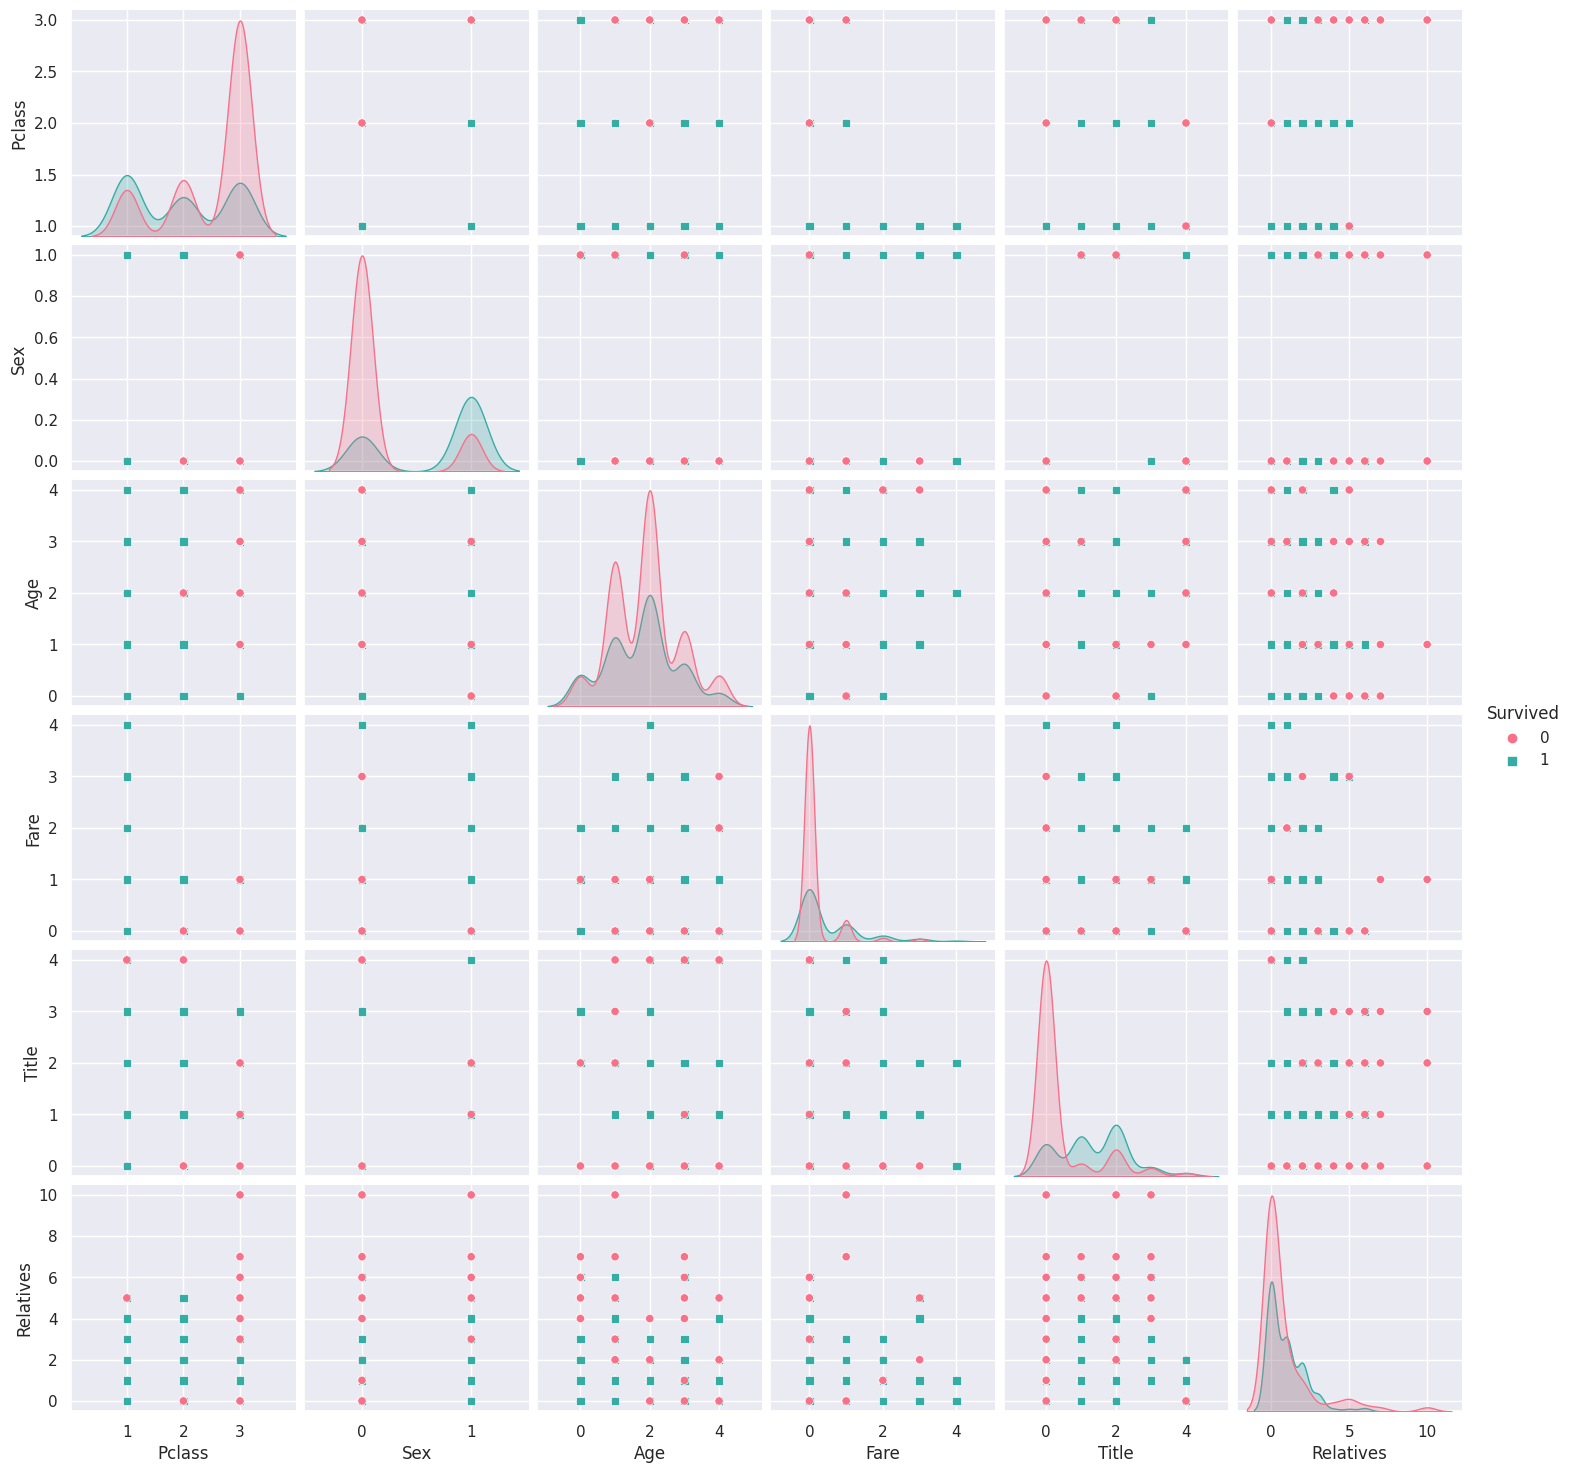

In [ ]:
# Finalmente observamos de nuevo las distribuciones de supervivencia con cada variable
p=sns.pairplot(train, hue = 'Survived', palette="husl", markers=["o", "s"])

In [ ]:
#Conseguimos las variables necesarias para hacer las prediccions
X_train = train[["Pclass","Sex","Relatives","Title"]].to_numpy(dtype = np.float32).reshape(-1, 4)
y_train = (train['Survived'].to_numpy()).astype(np.int0)
X_test = test[["Pclass","Sex","Relatives","Title"]].to_numpy(dtype = np.float32).reshape(-1, 4)
print((np.sum(y_train)/y_train.shape[0])*100) 

38.38383838383838


In [ ]:
#Separamos los datos en train para hacer los entrenamientos y calificaciones del modelo
from sklearn.model_selection import train_test_split
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, train_size=0.7)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

0.8544776119402985
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       165
           1       0.83      0.78      0.80       103

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268

[23.18910524 25.03896409 12.91483642 38.85709425]


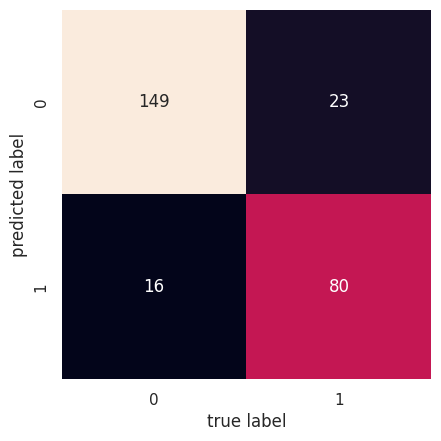

In [ ]:
forestGump = RandomForestClassifier(criterion = "gini",   
                                      n_estimators=250,
                                      max_depth = 4)
forestGump.fit(X_train_train, y_train_train)
y_train_pred = forestGump.predict(X_train_test)
print(accuracy_score(y_train_test,y_train_pred))
cm = confusion_matrix(y_train_test, y_train_pred)
print(classification_report(y_train_test, y_train_pred))
print(forestGump.feature_importances_*100)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

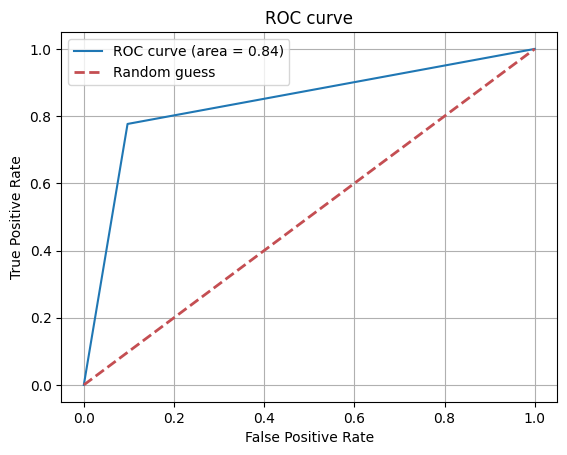

In [ ]:
from sklearn.metrics import roc_curve, auc
mpl.rcParams.update(mpl.rcParamsDefault)
fpr, tpr, thresh = roc_curve(y_train_test, y_train_pred)
aucv = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %aucv)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [ ]:
pickle.dump(forestGump, open('randomForest.pkl','wb'))

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44


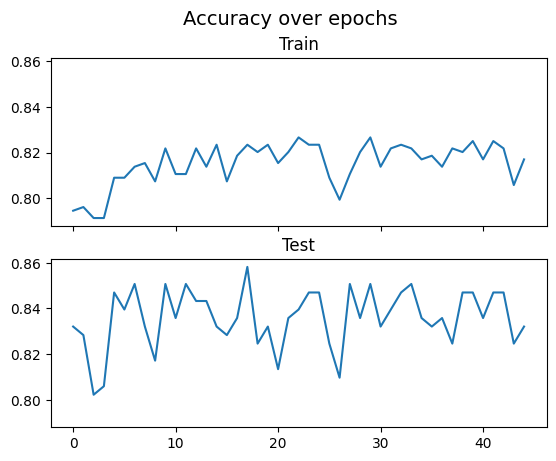

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
mpl.rcParams.update(mpl.rcParamsDefault)

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='adam', verbose=0, tol=1e-8, random_state=1,
                    learning_rate_init=.01)

N_TRAIN_SAMPLES = X_train_train.shape[0]
N_EPOCHS = 45
N_BATCH = 8
N_CLASSES = np.unique(y_train_train)

scores_train = []
scores_test = []

"""### Train epoch by epoch"""

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(X_train_train[indices, :], y_train_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(mlp.score(X_train_train, y_train_train))

    # SCORE TEST
    scores_test.append(mlp.score(X_train_test, y_train_test))

    epoch += 1

"""### Plot Accuracy results"""

""" Plot """
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

0.832089552238806
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       165
           1       0.77      0.80      0.78       103

    accuracy                           0.83       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.83      0.83      0.83       268



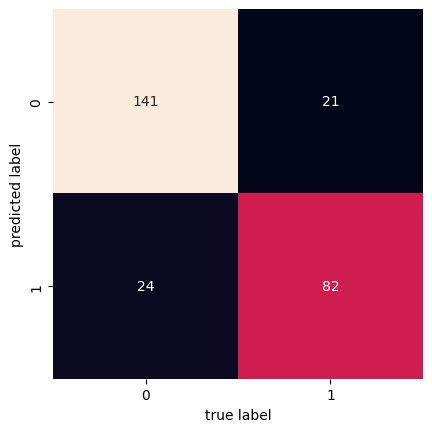

In [ ]:
y_train_pred = mlp.predict(X_train_test)
print(accuracy_score(y_train_test,y_train_pred))
cm = confusion_matrix(y_train_test, y_train_pred)
print(classification_report(y_train_test, y_train_pred))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

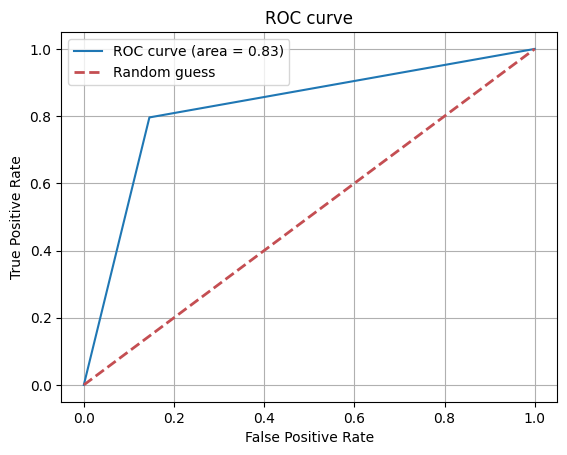

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
fpr, tpr, thresh = roc_curve(y_train_test, y_train_pred)
aucv = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %aucv)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [ ]:
pickle.dump(mlp, open('NN.pkl','wb'))

In [ ]:
pred_y = mlp.predict(X_test)
print(pred_y)
print(np.sum(pred_y)/test.shape[0])

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 1]
0.44258373205741625


In [ ]:
# print(test['PassengerId'].to_numpy().reshape(-1,1))
# print(pred_y.reshape(-1,1))
# print(np.concatenate((test['PassengerId'].to_numpy().reshape(-1,1),pred_y.reshape(-1,1)),axis=1))
df2ss = pd.DataFrame(np.concatenate((test['PassengerId'].to_numpy().reshape(-1,1),pred_y.reshape(-1,1)),axis=1), columns=['PassengerId','Survived'])
df2ss

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# from google.colab import files 
# files.download('output.csv')
df2ss.to_csv('gender_submission.csv', encoding = 'utf-8-sig',index=False)